Name : Vinush.CV

Reg no: 212222230176


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from keras import models

In [30]:
dataset_train = pd.read_csv('trainset.csv')

In [31]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [32]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
dataset_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1258,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


In [34]:
train_set = dataset_train.iloc[:,1:2].values

In [35]:
train_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [36]:
type(train_set)

numpy.ndarray

In [37]:
train_set.shape

(1259, 1)

In [38]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [39]:
training_set_scaled.shape

(1259, 1)

In [40]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)


In [41]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [42]:
X_train1.shape

(1199, 60, 1)

In [43]:
X_train.shape

(1199, 60)

In [44]:
model=Sequential()
model.add(layers.SimpleRNN(60,input_shape=(60,1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mse')

In [45]:
print("Name: Vinush.cv\nReg No: 212222230176")
model.summary()

Name: Vinush.cv
Reg No: 212222230176
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 60)                3720      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3781 (14.77 KB)
Trainable params: 3781 (14.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.fit(X_train1,y_train,epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 2s 13ms/step - loss: 0.0166
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 4.8303e-04
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 3.7185e-04
Epoch 4/100
38/38 [==============================] - 0s 12ms/step - loss: 3.4680e-04
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 3.4070e-04
Epoch 6/100
38/38 [==============================] - 0s 12ms/step - loss: 3.4069e-04
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 3.0474e-04
Epoch 8/100
38/38 [==============================] - 1s 20ms/step - loss: 3.3856e-04
Epoch 9/100
38/38 [==============================] - 1s 19ms/step - loss: 3.2012e-04
Epoch 10/100
38/38 [==============================] - 1s 19ms/step - loss: 3.4687e-04
Epoch 11/100
38/38 [==============================] - 1s 20ms/step - loss: 3.0063e-04
Epoch 12/100
38/38 [==============================] - 0s 12ms/step 

In [47]:
dataset_test = pd.read_csv('testset.csv')

In [48]:
test_set = dataset_test.iloc[:,1:2].values

In [49]:
test_set.shape

(125, 1)

In [50]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [51]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [52]:
X_test.shape

(1324, 60, 1)

In [53]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 5ms/step


Name:Vinush.cv
Register Number: 212222230176    


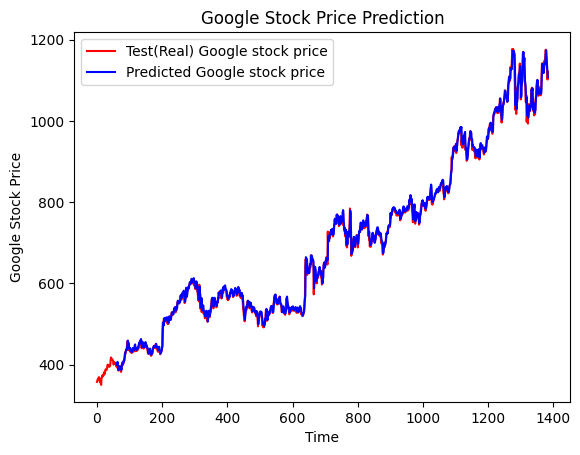

In [54]:
print("Name:Vinush.cv\nRegister Number: 212222230176    ")
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()